# Phenotypes by cluster, full cohort

In [10]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Calculate mean/median for CoS1 with different features of importance.

In [11]:
df_cos1 = pd.read_csv("../data/cos_pca_dbscan_v2_full_cohort.csv", index_col="ID")
df_cos1 = df_cos1.drop(columns =["PC1","PC2"])
df_lab = pd.read_csv("../data/cohort_labels_v2_full_cohort.csv")
df_features = pd.read_csv("../data/cohort_features_v2_full_cohort.csv")
labels = pd.merge(left=df_cos1, right=df_lab, on="ID")
features = pd.merge(left=df_cos1, right=df_features, on="ID")
full1 = pd.merge(left=features, right=labels, on='ID')
full1 = full1.drop('ID', axis=1)
char = full1.columns.values.tolist()
full1

,n_stays,anchor_age,suspected_infection,weight,height_chart,heart_rate_min,heart_rate_max,temperature_min,temperature_max,nbpm_min,...,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone,albumin,bilirubin,abps,sum_los,extended_los
0,2,80,1,43.00,150.0,93.0,120.0,98.5,101.1,34.0,...,1,1,0,0,0,0,1,1,12.014028,1
1,1,53,0,156.10,178.0,73.0,150.0,96.7,99.0,69.0,...,0,0,0,0,0,1,1,0,2.750729,0
2,1,78,1,66.95,175.0,59.0,141.0,97.6,98.7,55.0,...,0,1,0,0,0,0,0,1,6.356898,1
3,1,51,1,111.65,180.0,82.0,107.0,98.5,101.3,65.0,...,0,0,0,0,0,0,0,0,8.357373,1
4,1,70,1,69.85,170.0,77.0,99.0,96.8,98.0,59.0,...,0,1,0,0,0,0,0,1,2.489248,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6916,1,66,0,107.70,180.0,59.0,105.0,98.2,98.2,69.0,...,0,1,0,0,0,0,0,1,1.189988,0
6917,2,52,0,86.30,160.0,73.0,112.0,97.6,98.5,52.0,...,0,1,0,0,0,0,0,1,3.656262,1
6918,2,82,0,63.10,157.0,61.0,79.0,97.8,98.4,53.0,...,0,0,0,0,0,1,1,0,8.290440,1
6919,1,66,1,87.50,170.0,48.0,83.0,97.2,98.5,55.0,...,0,1,0,0,0,1,1,1,5.026181,1


Filter for features of interest, add columns containing cluster number. Calculate mean and median.

In [12]:
features = ['n_stays', 'suspected_infection', 'po2_max', 'gcs_min', 'sofa', 'extended_los', 'ventilation_status_oxygen']
mean = pd.DataFrame()
full1 = full1.loc[:, features]
full1['Cluster'] = 1000
mean = full1.loc[:, features].groupby(['extended_los']).mean()
median = full1.loc[:, features].groupby(['extended_los']).median()
full1

,n_stays,suspected_infection,po2_max,gcs_min,sofa,extended_los,ventilation_status_oxygen,Cluster
0,2,1,106.0,4.0,10,1,1,1000
1,1,0,82.0,13.0,4,0,1,1000
2,1,1,473.0,8.0,5,1,1,1000
3,1,1,100.0,11.0,7,1,0,1000
4,1,1,286.0,15.0,7,0,1,1000
...,...,...,...,...,...,...,...,...
6916,1,0,349.0,15.0,3,0,1,1000
6917,2,0,279.0,14.0,6,1,1,1000
6918,2,0,59.0,14.0,5,1,1,1000
6919,1,1,398.0,14.0,2,1,1,1000


Visualise cluster phenotypes

/var/folders/97/8lyvqyzd5bsfdkzn8pwdymb00000gn/T/ipykernel_3948/2360015418.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full2 = full1.append(full2, ignore_index=True)


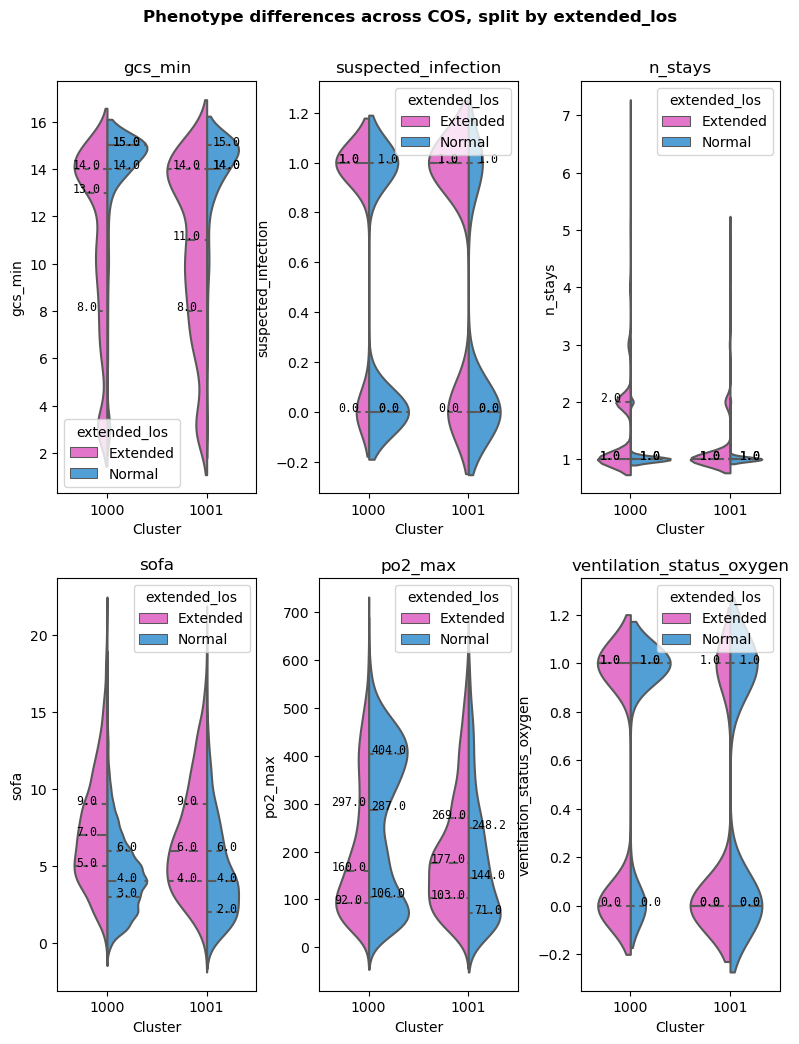

In [14]:
df_cos2 = pd.read_csv("../data/cos_2_pca_dbscan_v2_full_cohort.csv", index_col="ID")
df_cos2 = df_cos2.drop(columns =["PC1","PC2"])
df_lab = pd.read_csv("../data/cohort_labels_v2_full_cohort.csv")
df_features = pd.read_csv("../data/cohort_features_v2_full_cohort.csv")
labels = pd.merge(left=df_cos2, right=df_lab, on="ID")
features = pd.merge(left=df_cos2, right=df_features, on="ID")
full2 = pd.merge(left=features, right=labels, on='ID')
full2 = full2.drop('ID', axis=1)

features = ['n_stays', 'suspected_infection', 'po2_max', 'gcs_min', 'sofa', 'extended_los', 'ventilation_status_oxygen']
full2 = full2.loc[:, features]
full2['Cluster'] = 1001
# features2 = ['n_stays', 'suspected_infection', 'po2_max', 'gcs_min', 'sofa']
features2 = ['gcs_min', 'suspected_infection', 'n_stays', 'sofa', 'po2_max', 'ventilation_status_oxygen']
full2 = full1.append(full2, ignore_index=True)

df_plt = full2.copy()

df_plt["extended_los"] = np.where(df_plt["extended_los"] == 0, "Normal", "Extended")

col = 3
row = 2
fig, axs = plt.subplots(row, col, figsize=(8,10))
title = 'Phenotype differences across COS, split by extended_los'
fig.suptitle(title, fontweight="semibold", y=1.02)
# fig.tight_layout(pad=1.5)
fig.tight_layout(h_pad=4)

pal = sns.color_palette("husl", 9)
for i, feature in enumerate(features2):
    r = math.floor(i / col)
    c = i % col
    sns.violinplot(
        data=df_plt, x='Cluster',y=feature, hue='extended_los',
        ax=axs[r][c],
        scale='count', split=True, inner='quartile', width=0.8,
        palette={'Normal':pal[6],'Extended':pal[8]}).set(title=feature
    )
    
    for l in axs[r][c].lines:
        lines = l.get_data()
        axs[r][c].text(
            (lines[0][1] - 0.2, lines[0][0] + 0.2)[lines[0][0].is_integer()],
            lines[1][0],
            f'{l.get_data()[1][0]:.1f}',
            size='small',
            fontweight='normal',
            fontfamily="monospace",
            ha="center",
            va="baseline"
        )